In [1]:
%matplotlib inline
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1.98


In [4]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
#store gap values
#Y_train = df_train.gap.values
#row where testing examples start
#test_idx = df_train.shape[0]
#delete 'Id' column
#df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
#df_train = df_train.drop(['gap'], axis=1)

In [6]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)


In [7]:
#Drop the 'smiles' column
#df_all = df_all.drop(['smiles'], axis=1)
#vals = df_all.values
#X_train = vals[:test_idx]
#X_test = vals[test_idx:]
#print "Train features:", X_train.shape
#print "Train gap:", Y_train.shape
#print "Test features:", X_test.shape

Train features: (1000000, 256)
Train gap: (1000000,)
Test features: (824230, 256)


In [8]:
#LR = LinearRegression()
#LR.fit(X_train, Y_train)
#LR_pred = LR.predict(X_test)

In [28]:
#RF = RandomForestRegressor(oob_score=True)
#RF.fit(X_train, Y_train)
#RF_pred = RF.predict(X_test)

In [5]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [48]:
#write_to_file("sample1.csv", LR_pred)
#write_to_file("sample2.csv", RF_pred)

### END OF EXAMPLE

In [18]:
rf_model =  RandomForestRegressor(n_estimators = 10 , oob_score=True)

In [19]:
rf_model.fit(X_train,Y_train)

/Users/Luke/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:659: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [31]:
rf_model_50 =  RandomForestRegressor(n_estimators = 50 , oob_score=True)
rf_model_50.fit(X_train,Y_train)
rf_model_50.oob_score_

0.55236082333711511

In [32]:
rf_model_5 =  RandomForestRegressor(n_estimators = 5 , oob_score=True)
rf_model_5.fit(X_train,Y_train)
rf_model_5.oob_score_

-1.7376884443924472

In [26]:
rf_model.oob_score_

0.31887252515949349

In [29]:
RF.oob_score_

0.31943787536984347

### SHUFFLED DATA TESTING

In [5]:
from sklearn import preprocessing
from sklearn import grid_search
from sklearn.metrics import roc_curve, auc

In [6]:
df_train['is_train'] = np.random.uniform(0, 1, len(df_train)) <= .75
train, validate = df_train[df_train['is_train']==True], df_train[df_train['is_train']==False]

In [7]:
#store gap values
y_train = train.gap.values
y_validate = validate.gap.values
#delete 'gap','is_train', smiles' columns
train = train.drop(['gap'], axis=1)
train = train.drop(['is_train'], axis=1)
train = train.drop(['smiles'], axis=1)
validate = validate.drop(['gap'], axis=1)
validate = validate.drop(['is_train'], axis=1)
validate = validate.drop(['smiles'], axis=1)

In [8]:
x_train = train.values
x_validate = validate.values

In [9]:
train.shape, validate.shape

((749948, 256), (250052, 256))

In [ ]:
%%time
num_features = [10,15,20]
for i in num_features:
    rf_sim =  RandomForestRegressor()
    rf_sim.fit(x_train_sim,y_train)
    predicted = rf_sim.predict(x_validate_sim)
    print("RMSE: %f" % np.sqrt(mean_squared_error(y_validate,predicted)))

In [13]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [14]:
rf.score(x_validate,y_validate)

0.55171473466479903

### grid_searchCV trials

In [11]:
from sklearn.grid_search import GridSearchCV

In [12]:
params = {'max_features':('auto','sqrt','log2',10,25,50), 'n_estimators':[5,10,15]}

In [13]:
%%time
rf = RandomForestRegressor()
rf_search = GridSearchCV(estimator = rf, param_grid = params, cv = 5)
rf_search.fit(x_train,y_train)

CPU times: user 43min 56s, sys: 11min 33s, total: 55min 30s
Wall time: 59min 26s


In [15]:
rf_search.grid_scores_

[mean: 0.55123, std: 0.00097, params: {'max_features': 'auto', 'n_estimators': 5},
 mean: 0.55140, std: 0.00099, params: {'max_features': 'auto', 'n_estimators': 10},
 mean: 0.55148, std: 0.00098, params: {'max_features': 'auto', 'n_estimators': 15},
 mean: 0.55127, std: 0.00099, params: {'max_features': 'sqrt', 'n_estimators': 5},
 mean: 0.55144, std: 0.00099, params: {'max_features': 'sqrt', 'n_estimators': 10},
 mean: 0.55151, std: 0.00096, params: {'max_features': 'sqrt', 'n_estimators': 15},
 mean: 0.55117, std: 0.00093, params: {'max_features': 'log2', 'n_estimators': 5},
 mean: 0.55143, std: 0.00100, params: {'max_features': 'log2', 'n_estimators': 10},
 mean: 0.55151, std: 0.00096, params: {'max_features': 'log2', 'n_estimators': 15},
 mean: 0.55123, std: 0.00095, params: {'max_features': 10, 'n_estimators': 5},
 mean: 0.55144, std: 0.00094, params: {'max_features': 10, 'n_estimators': 10},
 mean: 0.55149, std: 0.00095, params: {'max_features': 10, 'n_estimators': 15},
 mean: 0

In [16]:
rf_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=50, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [17]:
rf_search.best_score_

0.55153240796480096

In [23]:
np.sqrt(mean_squared_error(y_validate,rf_search.predict(x_validate)))

0.2722208311447713

In [23]:
best.score(x_validate,y_validate)

0.55178523646530153

In [28]:
params2 = {'max_features':('auto','sqrt','log2',10,15,20,25,30,35,40,45,50)}

In [30]:
%%time
rf = RandomForestRegressor()
rf2_search = GridSearchCV(estimator = rf, param_grid = params2, cv = 5)
rf2_search.fit(x_train,y_train)
best = rf2_search.best_estimator_

CPU times: user 29min 23s, sys: 8min 30s, total: 37min 54s
Wall time: 40min 56s


In [31]:
best.score(x_validate,y_validate)

0.5517517395437892

In [32]:
best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=50, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## some visualizations

### how is the response distributed?

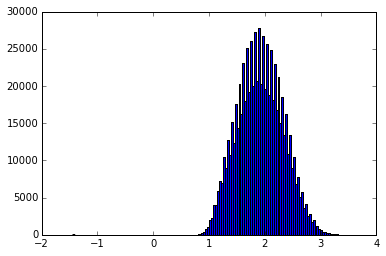

In [119]:
plt.hist(y_train,bins=150)
plt.show()

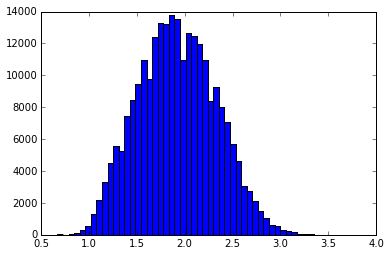

In [121]:
plt.hist(y_validate,bins=50)
plt.show()

In [42]:
best_predictions = best.predict(x_validate)

### distribution of RF predictions

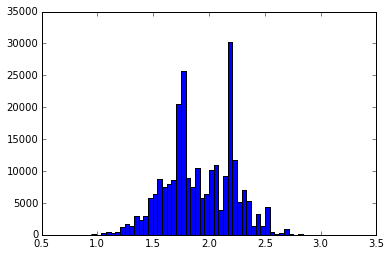

In [59]:
plt.hist(best_predictions,bins=50)
plt.show()

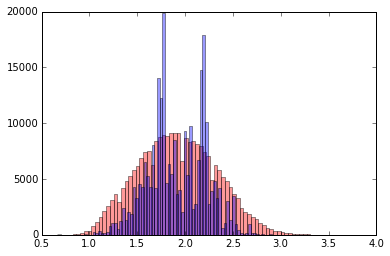

In [126]:
plt.hist(y_validate,color='r',alpha=0.4,bins=75)
plt.hist(best_predictions,color='b',alpha=0.4,bins=75)
#plt.legend()
plt.show()

### RF residuals

In [49]:
resids = best_predictions - y_validate

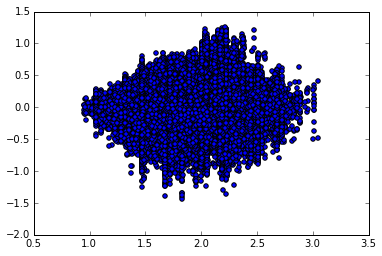

In [54]:
plt.scatter(best_predictions,resids)
plt.show()

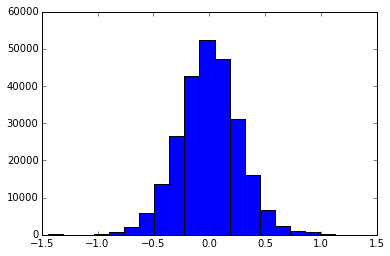

In [111]:
plt.hist(resids,bins=20)
plt.show()

### what's the deal w/ spikes in certain prediction values?

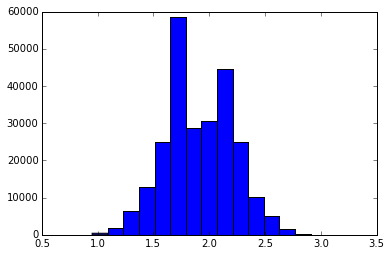

In [64]:
(n, bins, patches) = plt.hist(best_predictions, bins=15, label='hst')

In [65]:
bins

array([ 0.9502   ,  1.0900957,  1.2299914,  1.3698871,  1.5097828,
        1.6496785,  1.7895742,  1.9294699,  2.0693656,  2.2092613,
        2.349157 ,  2.4890527,  2.6289484,  2.7688441,  2.9087398,
        3.0486355])

In [66]:
n

array([  4.19000000e+02,   1.72600000e+03,   6.35500000e+03,
         1.28010000e+04,   2.48750000e+04,   5.84590000e+04,
         2.86570000e+04,   3.04590000e+04,   4.44470000e+04,
         2.50410000e+04,   1.02250000e+04,   5.03400000e+03,
         1.45100000e+03,   1.13000000e+02,   2.70000000e+01])

In [72]:
bins[5],n[5]

(1.6496784983850001, 58459.0)

In [73]:
bins[8],n[8]

(2.0693655974160001, 44447.0)

1.74760548816 17334.0


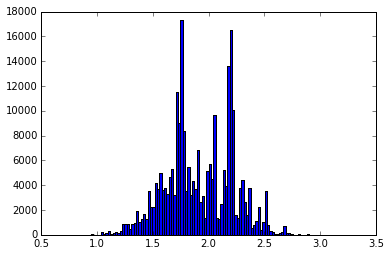

In [83]:
(n, bins, patches) = plt.hist(best_predictions, bins=100, label='hst')
for i in range(0,len(n)):
    if n[i]==max(n):
        print bins[i],n[i]

### feature extraction

In [85]:
importances = best.feature_importances_
std = np.std([tree.feature_importances_ for tree in best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 118 (0.301125)
2. feature 67 (0.106256)
3. feature 24 (0.102857)
4. feature 101 (0.096492)
5. feature 217 (0.082741)
6. feature 250 (0.039946)
7. feature 71 (0.029188)
8. feature 224 (0.028582)
9. feature 0 (0.024619)
10. feature 186 (0.023213)
11. feature 89 (0.021175)
12. feature 125 (0.019843)
13. feature 122 (0.019103)
14. feature 207 (0.014519)
15. feature 86 (0.012611)
16. feature 247 (0.010787)
17. feature 36 (0.009472)
18. feature 172 (0.009267)
19. feature 242 (0.008092)
20. feature 5 (0.007931)
21. feature 195 (0.006914)
22. feature 68 (0.006177)
23. feature 251 (0.005964)
24. feature 43 (0.002948)
25. feature 175 (0.002870)
26. feature 131 (0.002455)
27. feature 6 (0.002212)
28. feature 225 (0.002094)
29. feature 199 (0.000314)
30. feature 198 (0.000229)
31. feature 4 (0.000004)
32. feature 76 (0.000000)
33. feature 80 (0.000000)
34. feature 81 (0.000000)
35. feature 79 (0.000000)
36. feature 78 (0.000000)
37. feature 82 (0.000000)
38. feature 77 

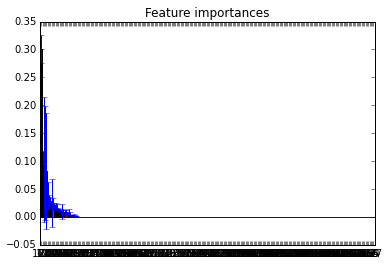

In [89]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### create subset X matrix of top features (i.e. ones w/o feature_importances_ = 0)

In [92]:
indices[:31]

array([118,  67,  24, 101, 217, 250,  71, 224,   0, 186,  89, 125, 122,
       207,  86, 247,  36, 172, 242,   5, 195,  68, 251,  43, 175, 131,
         6, 225, 199, 198,   4])

In [95]:
x_train.shape

(749911, 256)

In [99]:
len(x_train[:,0])

749911

In [100]:
x_train_sub = x_train[:,indices[:31]]
x_train_sub.shape

(749911, 31)

In [101]:
x_validate.shape

(250089, 256)

In [102]:
x_validate_sub = x_validate[:,indices[:31]]
x_validate_sub.shape

(250089, 31)

In [103]:
%%time
rf_sub_model =  RandomForestRegressor()
rf_sub_model.fit(x_train_sub,y_train)

CPU times: user 32.9 s, sys: 596 ms, total: 33.5 s
Wall time: 34.1 s


In [105]:
rf_sub_model.score(x_validate_sub,y_validate)

0.55175677443448479

Almost equal to initial RF model (score = 0.5517147)

In [106]:
sub_predictions = rf_sub_model.predict(x_validate_sub)

In [198]:
%%time
num_features = [10,15,20]
for i in num_features:
    x_train_sim = x_train[:,indices[:i]]
    x_validate_sim = x_validate[:,indices[:i]]
    rf_sim =  RandomForestRegressor()
    rf_sim.fit(x_train_sim,y_train)
    predicted = rf_sim.predict(x_validate_sim)
    print("RMSE: %f" % np.sqrt(mean_squared_error(y_validate,predicted)))

RMSE: 0.294627
RMSE: 0.279337
RMSE: 0.275427
CPU times: user 38.9 s, sys: 471 ms, total: 39.3 s
Wall time: 39.4 s


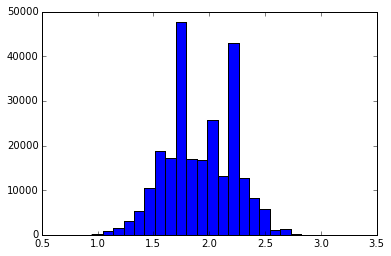

In [109]:
plt.hist(sub_predictions,bins=25)
plt.show()

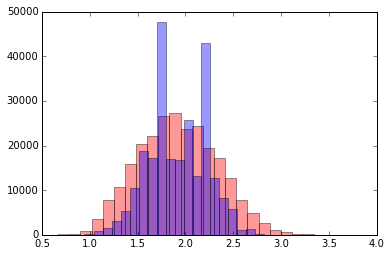

In [127]:
plt.hist(y_validate,color='r',alpha=0.4,bins=25)
plt.hist(sub_predictions,color='b',alpha=0.4,bins=25)
#plt.legend()
plt.show()

What is going on here? A new model was fit using only the features which seemed to be contributing to predictions (31 distinct features). Still, we're getting some weird prediction spikes around 1.7 and 2.1 for the response (gap).

In [21]:
from sklearn.metrics import mean_squared_error

In [172]:
%%time
RF = RandomForestRegressor(oob_score=True)
RF.fit(x_train, y_train)
RF_pred = RF.predict(x_validate)
print mean_squared_error(y_validate,RF_pred)

0.07448083614
CPU times: user 46.2 s, sys: 5.26 s, total: 51.5 s
Wall time: 53.9 s


/Users/Luke/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:659: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [173]:
np.sqrt(mean_squared_error(y_validate,RF_pred))

0.27291177354594387

In [174]:
np.sqrt(mean_squared_error(y_validate,sub_predictions))

0.27292041872113293

In [130]:
mean_squared_error(y_validate,best_predictions)

0.07448639161369261

### lasso trial

http://scikit-learn.org/stable/modules/linear_model.html

In [133]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [134]:
alpha = 0.1
lasso = Lasso(alpha=alpha)

In [135]:
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_validate)
r2_score_lasso = r2_score(y_validate, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.000057


In [136]:
mean_squared_error(y_validate,y_pred_lasso)

0.16618161640703291

In [137]:
y_pred_lasso_sub = lasso.fit(x_train_sub, y_train).predict(x_validate_sub)
r2_score_lasso_sub = r2_score(y_validate, y_pred_lasso_sub)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso_sub)
print(mean_squared_error(y_validate,y_pred_lasso_sub))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.000057
0.166181616407


In [138]:
from sklearn.linear_model import LassoCV

In [139]:
lassocv = LassoCV()

In [140]:
y_pred_lassoCV = lassocv.fit(x_train,y_train).predict(x_validate)
print(lassocv)
print("rmse: %f" % mean_squared_error(y_validate,y_pred_lassoCV))

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
rmse: 0.089622


/Users/Luke/anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:424: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


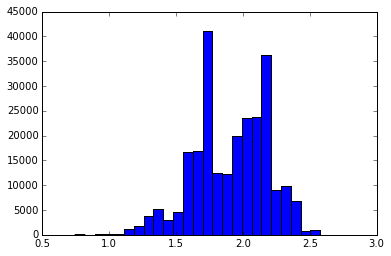

In [146]:
plt.hist(y_pred_lassoCV,bins=25)
plt.show()

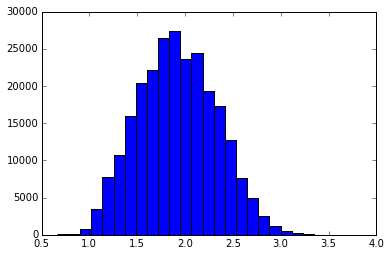

In [145]:
plt.hist(y_validate,bins=25)
plt.show()

### x feature matrix exploration

In [148]:
x_train.shape

(749911, 256)

In [182]:
x_train_small = x_train[x_train.sum(axis=0)>100]

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 749911 but corresponding boolean dimension is 256
  if __name__ == '__main__':


In [191]:
x_train_small = np.empty(shape=[x_train.shape[0],0])
for i in range(256):
    if col_sums[i] > 100:
        np.append(x_train_small,x_train[:,i])

In [192]:
x_train_small.shape

(749911, 0)

In [149]:
col_sums = x_train.sum(axis=0)

In [150]:
col_sums.shape

(256,)

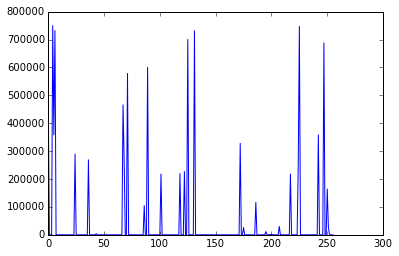

In [152]:
plt.plot(col_sums)

In [161]:
x_train[:,0].shape

(749911,)

In [163]:
x_train.shape[0]

749911

In [208]:
bad_cols = np.nonzero(x_train.sum(axis=0) < 100)
x_train_small = np.delete(x_train, bad_cols, axis=1)

In [209]:
x_train_small.shape

(749911, 31)

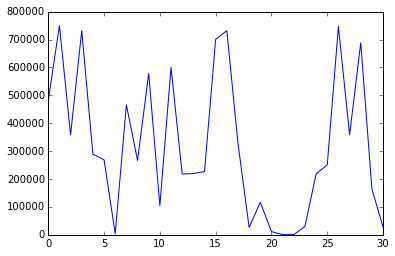

In [210]:
plt.plot(x_train_small.sum(axis=0))
plt.show()

### xgboost

In [167]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV

In [169]:
rng = np.random.RandomState(31337)

In [171]:
%%time
kf = KFold(y_train.shape[0], n_folds=2, shuffle=True, random_state=rng)
for train_index, test_index in kf:
    xgb_model = xgb.XGBRegressor().fit(x_train,y_train)
    predictions = xgb_model.predict(x_validate)
    actuals = y_validate
    print(mean_squared_error(actuals, predictions))

0.0820629777686
0.0820629777686
CPU times: user 19min 18s, sys: 9min 23s, total: 28min 41s
Wall time: 33min 29s


### rdkit

In [20]:
good_cols = np.nonzero(x_train.sum(axis=0) > 100)

In [9]:
bad_cols

(array([  1,   2,   3,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  37,  38,  39,  40,  41,  42,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  69,  70,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,  88,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173,
        174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188,
        189, 190, 191, 192, 193, 194, 196, 197, 200

In [18]:
bad_cols[0]

array([  1,   2,   3,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  37,  38,  39,  40,  41,  42,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  69,  70,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,  88,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 119, 120, 121, 123, 124, 126, 127, 128, 129, 130, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173,
       174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188,
       189, 190, 191, 192, 193, 194, 196, 197, 200, 201, 202, 20

In [12]:
x_train.shape

(749824, 256)

In [23]:
good_cols = np.nonzero(x_train.sum(axis=0) > 100)

In [24]:
x_train[:,good_cols[0]].shape

(749824, 31)